<a href="https://colab.research.google.com/github/celladevv/Churn/blob/main/Increase_Retention_and_Reduce_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/churn_clv_telco.csv')

# Quick check of the data
df.head()


Mounted at /content/drive


,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,932aff1e-186f-418c-8716-28bba167c384,NY,86,area_code_510,False,False,0,70.7,125,12.02,...,113,17.94,174.6,107,7.86,0.0,0,0.0,2,False
1,143a0b05-b95a-4d00-ad2a-9c1b18234c29,VT,165,area_code_510,False,False,0,242.9,126,41.29,...,65,17.83,228.4,126,10.28,0.0,0,0.0,1,False
2,45debf35-7e4d-42da-ba4e-d737a8997e16,KS,70,area_code_415,False,False,0,222.8,114,37.88,...,113,18.35,223.5,122,10.06,0.0,0,0.0,1,False
3,76b4b68f-1113-4411-88ad-de38b482e9fb,NM,158,area_code_408,False,False,0,172.4,114,29.31,...,69,21.81,235.3,104,10.59,0.0,0,0.0,2,False
4,6ee9cecd-1a09-4f4a-937e-aa848c392bed,ND,101,area_code_415,False,False,0,217.7,118,37.01,...,128,19.69,185.3,128,8.34,0.0,0,0.0,3,False


# **EDA**

In [ ]:
df.shape
# Get list of columns and their data types
df.info()
# Get summary statistics of the dataset
df.describe()
# Count unique values in each column
for col in df.columns:
 print(col, df[col].nunique())
# Isolate the categorical variables
categorical_variables = [col for col in df.columns if df[col].nunique() <= 11]
categorical_variables
# Isolate the numerical variables


numerical_variables = [col for col in df.columns if df[col].dtype != "object"
                       and df[col].nunique() > 11
                       and col not in ["Customer_ID"]]
numerical_variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    4250 non-null   object 
 1   state                          4250 non-null   object 
 2   account_length                 4250 non-null   int64  
 3   area_code                      4250 non-null   object 
 4   international_plan             4250 non-null   bool   
 5   voice_mail_plan                4250 non-null   bool   
 6   number_vmail_messages          4250 non-null   int64  
 7   total_day_minutes              4250 non-null   float64
 8   total_day_calls                4250 non-null   int64  
 9   total_day_charge               4250 non-null   float64
 10  total_eve_minutes              4250 non-null   float64
 11  total_eve_calls                4250 non-null   int64  
 12  total_eve_charge               4250 non-null   f

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge']

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()


In [ ]:
# Displaying the structure of the dataset: column names, data types, and non-null counts.
data_info = df.info()

# Generating a quick summary of the dataset to understand basic statistics for numerical columns
data_description = df.describe()

data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    4250 non-null   object 
 1   state                          4250 non-null   object 
 2   account_length                 4250 non-null   int64  
 3   area_code                      4250 non-null   object 
 4   international_plan             4250 non-null   bool   
 5   voice_mail_plan                4250 non-null   bool   
 6   number_vmail_messages          4250 non-null   int64  
 7   total_day_minutes              4250 non-null   float64
 8   total_day_calls                4250 non-null   int64  
 9   total_day_charge               4250 non-null   float64
 10  total_eve_minutes              4250 non-null   float64
 11  total_eve_calls                4250 non-null   int64  
 12  total_eve_charge               4250 non-null   f

(None,
        account_length  number_vmail_messages  total_day_minutes  \
 count     4250.000000            4250.000000        4250.000000   
 mean       100.236235               7.631765         180.259600   
 std         39.698401              13.439882          54.012373   
 min          1.000000               0.000000           0.000000   
 25%         73.000000               0.000000         143.325000   
 50%        100.000000               0.000000         180.450000   
 75%        127.000000              16.000000         216.200000   
 max        243.000000              52.000000         351.500000   
 
        total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
 count      4250.000000       4250.000000        4250.000000      4250.000000   
 mean         99.907294         30.644682         200.173906       100.176471   
 std          19.850817          9.182096          50.249518        19.908591   
 min           0.000000          0.000000           0.0

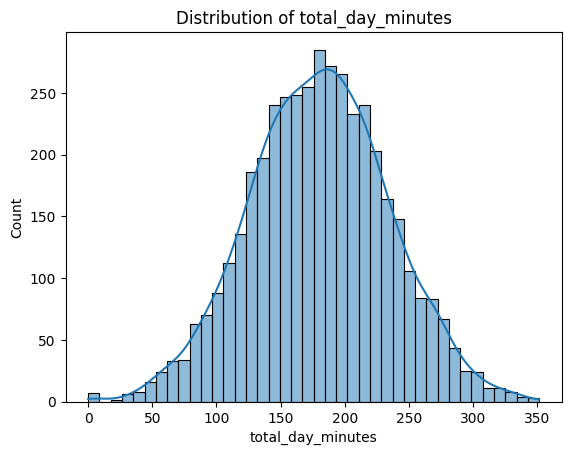

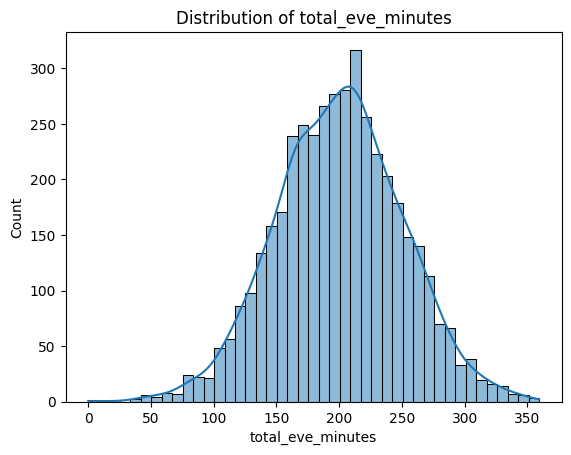

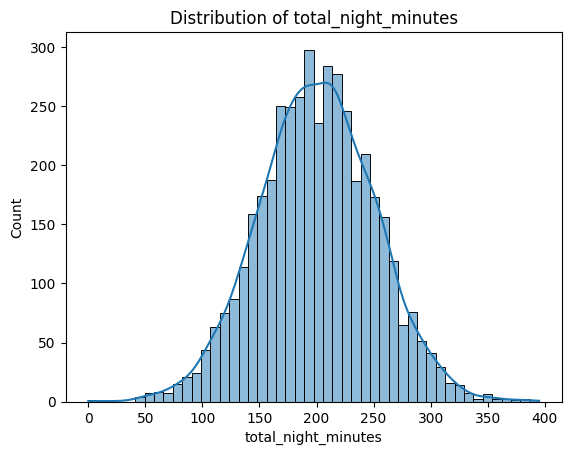

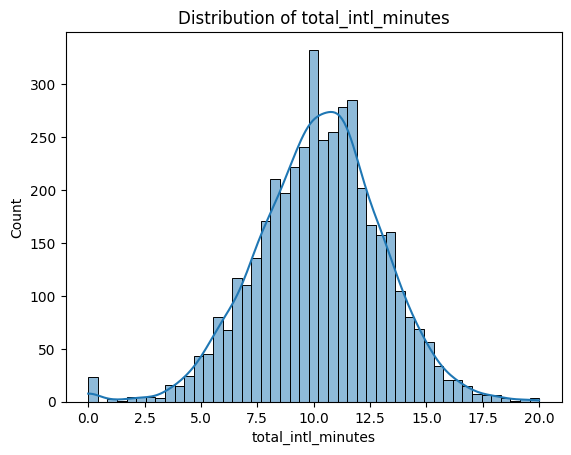

In [ ]:
usage_columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
for column in usage_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

#From the statistics, we see:

#The average account length is around 100 days.
#Usage statistics like total_day_minutes and total_eve_minutes show values centered around their mean with varying spreads.
#The number_customer_service_calls ranges from 0 to 9 calls, indicating that some customers may have contacted customer service multiple times.

In [ ]:
# Calculating the average number of calls by churn status across different call types
call_metrics = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls']
call_patterns = df.groupby('churn')[call_metrics].mean()

# Displaying call patterns by churn status in Colab
from IPython.display import display

# Display the DataFrame as a table
display(call_patterns)

# Alternatively, you can just write the variable name to display it
#call_patterns

#average call patterns by churn status across different call types:
  #Total Day, Evening, Night, and International Calls:
    #Churned customers have slightly higher day call averages but slightly lower averages for evening, night, and international calls.
  #Customer Service Calls: The most pronounced difference is in customer service interactions, where churned customers average over 2 calls,
    #compared to about 1.4 for non-churned customers. This suggests dissatisfaction or issues that might lead to churn.
#The pattern indicates that higher customer service interactions correlate with churn, potentially due to unresolved issues or dissatisfaction.




,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls
churn,,,,,
False,99.813801,100.231380,99.942771,4.460570,1.441676
True,100.478261,99.841137,99.209030,4.217391,2.275920


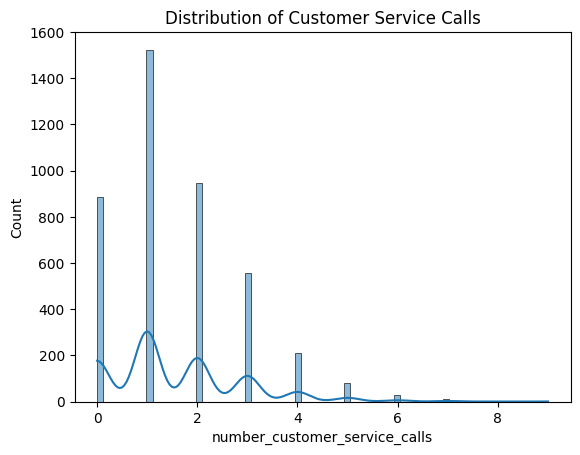

Average Customer Service Calls: 1.5590588235294118


In [ ]:
sns.histplot(df['number_customer_service_calls'], kde=True)
plt.title('Distribution of Customer Service Calls')
plt.show()
print(f"Average Customer Service Calls: {df['number_customer_service_calls'].mean()}")


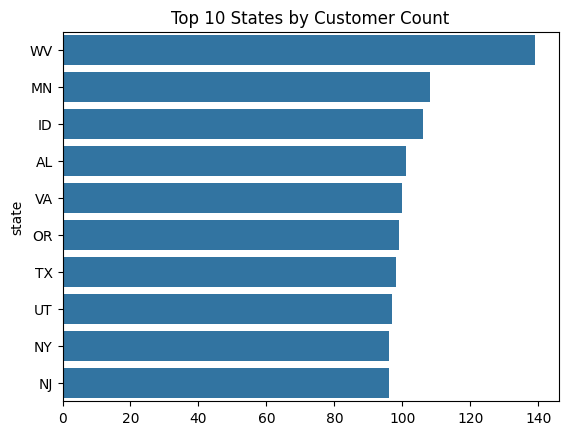

,state,churn
0,NJ,27.083333
1,CA,25.641026
2,WA,22.500000
3,MD,22.093023
4,MT,21.250000
5,OK,20.512821
6,NV,20.481928
7,SC,19.444444
8,TX,19.387755
9,MS,18.292683


In [ ]:
top_states = df['state'].value_counts().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 States by Customer Count')
plt.show()

# Calculating churn rate by state
churn_by_state = df.groupby('state')['churn'].mean().sort_values(ascending=False) * 100  # percentage format

# Resetting the index to make 'state' a column in the DataFrame
churn_by_state_df = churn_by_state.reset_index()

# Displaying the churn rate by state in Colab
from IPython.display import display

# Display the DataFrame as a table
display(churn_by_state_df)

# Alternatively, just writing the variable name will display it in Colab
# churn_by_state_df




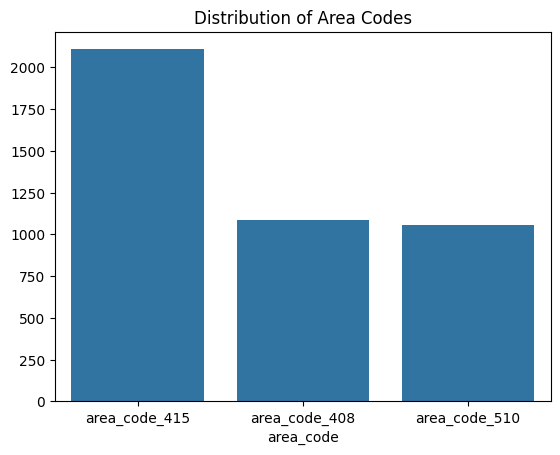

In [ ]:
area_counts = df['area_code'].value_counts()
sns.barplot(x=area_counts.index, y=area_counts.values)
plt.title('Distribution of Area Codes')
plt.show()


In [ ]:
intl_plan_percentage = (df['international_plan'] == 'yes').mean() * 100
voicemail_plan_percentage = (df['voice_mail_plan'] == 'yes').mean() * 100
print(f"International Plan Subscription: {intl_plan_percentage:.2f}%")
print(f"Voicemail Plan Subscription: {voicemail_plan_percentage:.2f}%")


International Plan Subscription: 0.00%
Voicemail Plan Subscription: 0.00%


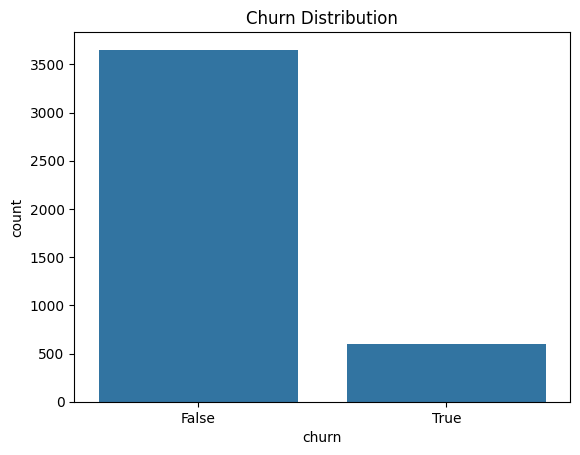

Churn Rate: 14.07%


In [ ]:
churn_rate = (df['churn'] == True).mean() * 100
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()
print(f"Churn Rate: {churn_rate:.2f}%")


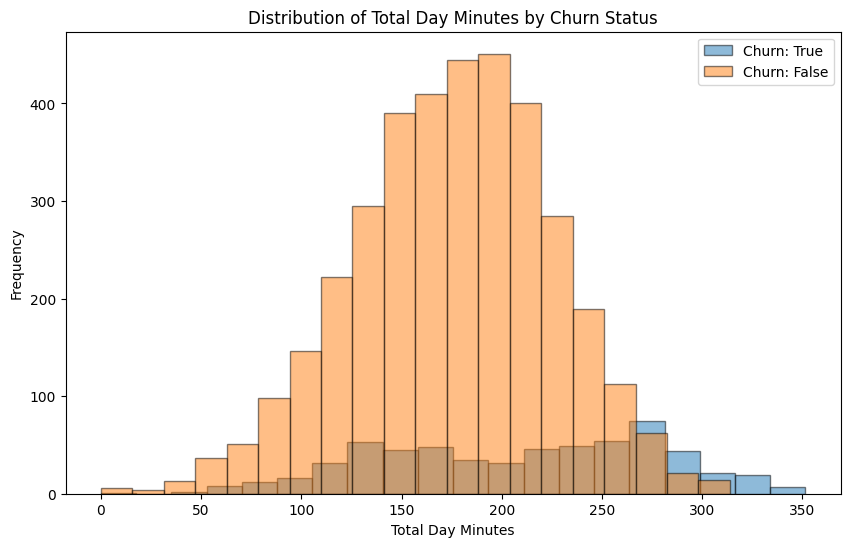

In [ ]:
import matplotlib.pyplot as plt

# Plotting histogram distributions of total_day_minutes grouped by churn status
plt.figure(figsize=(10, 6))

for churn_status in [True, False]:
    subset = df[df['churn'] == churn_status]
    plt.hist(subset['total_day_minutes'], bins=20, alpha=0.5, label=f"Churn: {churn_status}", edgecolor='black')

plt.title('Distribution of Total Day Minutes by Churn Status')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Total Day Minutes grouped by Churn Status:

# - Non-churned (False): These customers show a range of usage but tend to center around a moderate number of total day minutes.
# - Churned (True): Customers who churned seem to have higher usage levels, with a significant concentration in the upper range of total day minutes.
#This pattern suggests that higher usage might correlate with a greater likelihood of churn.

#Higher usage correlating with a greater likelihood of churn can be interpreted in a few ways, depending on the context of the service:
  #Service Quality: Higher usage may reveal limitations or dissatisfaction with service quality. For instance, heavy users might experience issues like network limitations or billing that doesn’t align well with their needs, pushing them toward churn.
  #Cost Sensitivity: High usage often leads to higher costs, especially if the service plan isn’t optimized for such levels of use. Customers may feel that the service has become too expensive and seek alternatives.
  #Service Saturation: High-usage customers may have reached a saturation point with the service, meaning they no longer find value in additional usage or features and might churn to try something different.


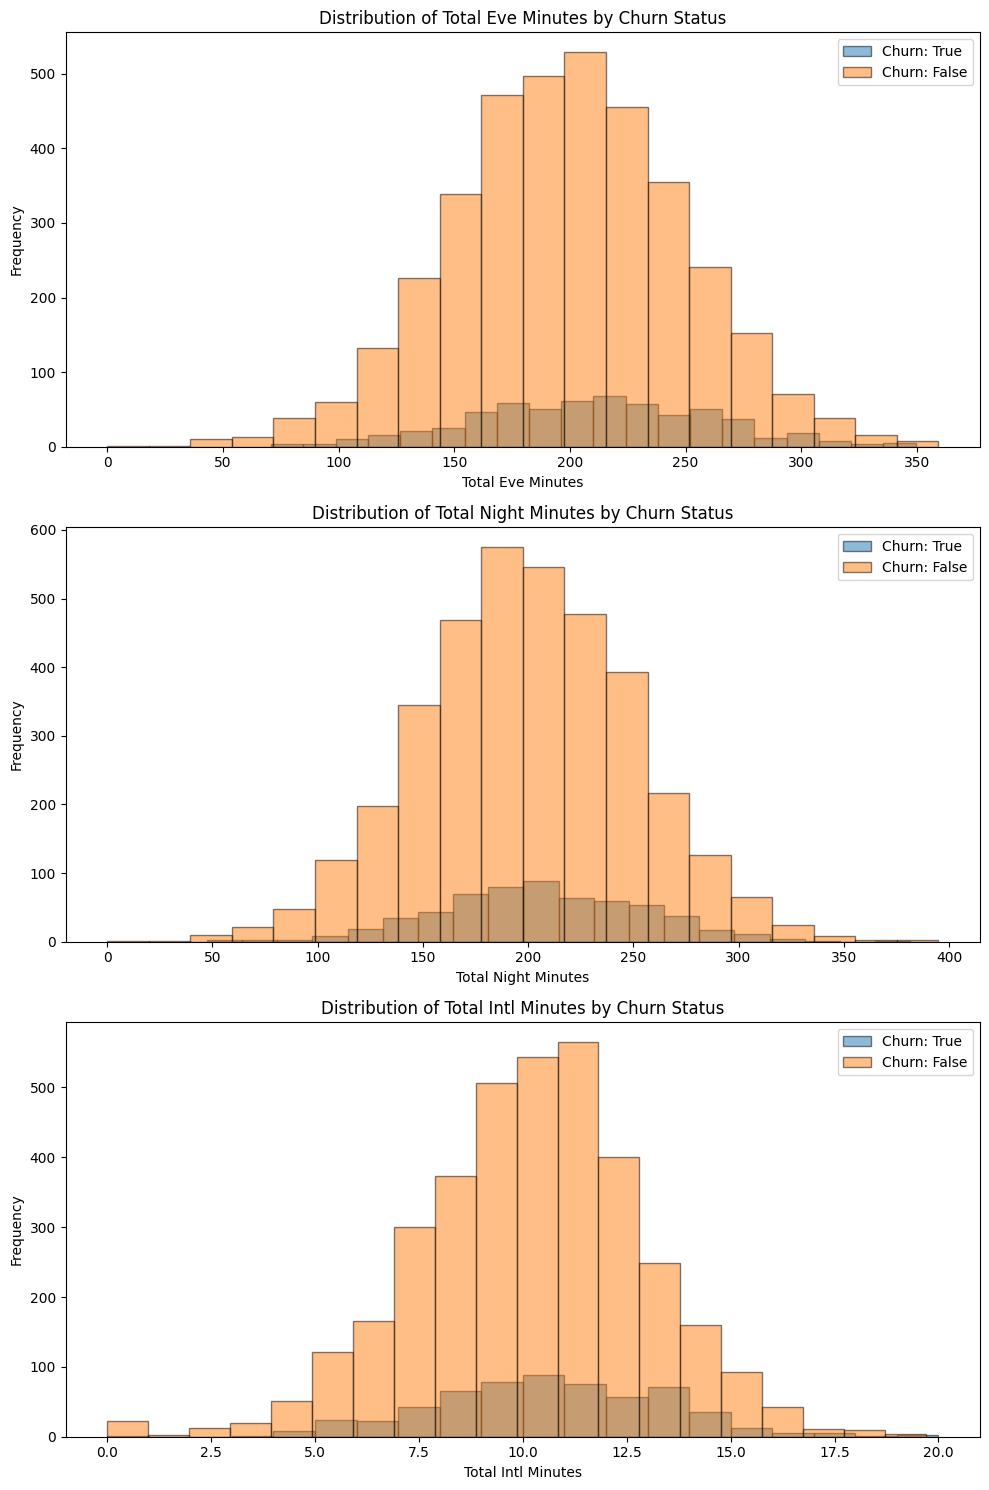

In [ ]:
# Plotting histograms for additional usage metrics by churn status
usage_metrics = ['total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
fig, axes = plt.subplots(nrows=len(usage_metrics), ncols=1, figsize=(10, 15))

for ax, metric in zip(axes, usage_metrics):
    for churn_status in [True, False]:
        subset = df[df['churn'] == churn_status]
        ax.hist(subset[metric], bins=20, alpha=0.5, label=f"Churn: {churn_status}", edgecolor='black')
    ax.set_title(f'Distribution of {metric.replace("_", " ").title()} by Churn Status')
    ax.set_xlabel(metric.replace("_", " ").title())
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

#Total Evening Minutes:
  #Both churned and non-churned groups display similar usage distributions, but churned customers have slightly more cases at the higher usage end.

#Total Night Minutes:
  #There is no substantial difference between churned and non-churned groups. This suggests that night-time usage may not be a significant factor influencing churn.

#Total International Minutes:
  #Churned customers show a slightly higher range of international minutes, although the distributions between churned and non-churned groups are close.

#The most noticeable trend is still in the daytime usage (as seen in the initial analysis),
#where churned customers tend to have higher usage levels. Evening and international minutes show minor differences,
#while night minutes show almost no differentiation between churn groups.
#This suggests that daytime activities may correlate more strongly with customer dissatisfaction or costs, leading to churn.



# **Correlation** **Matrix**

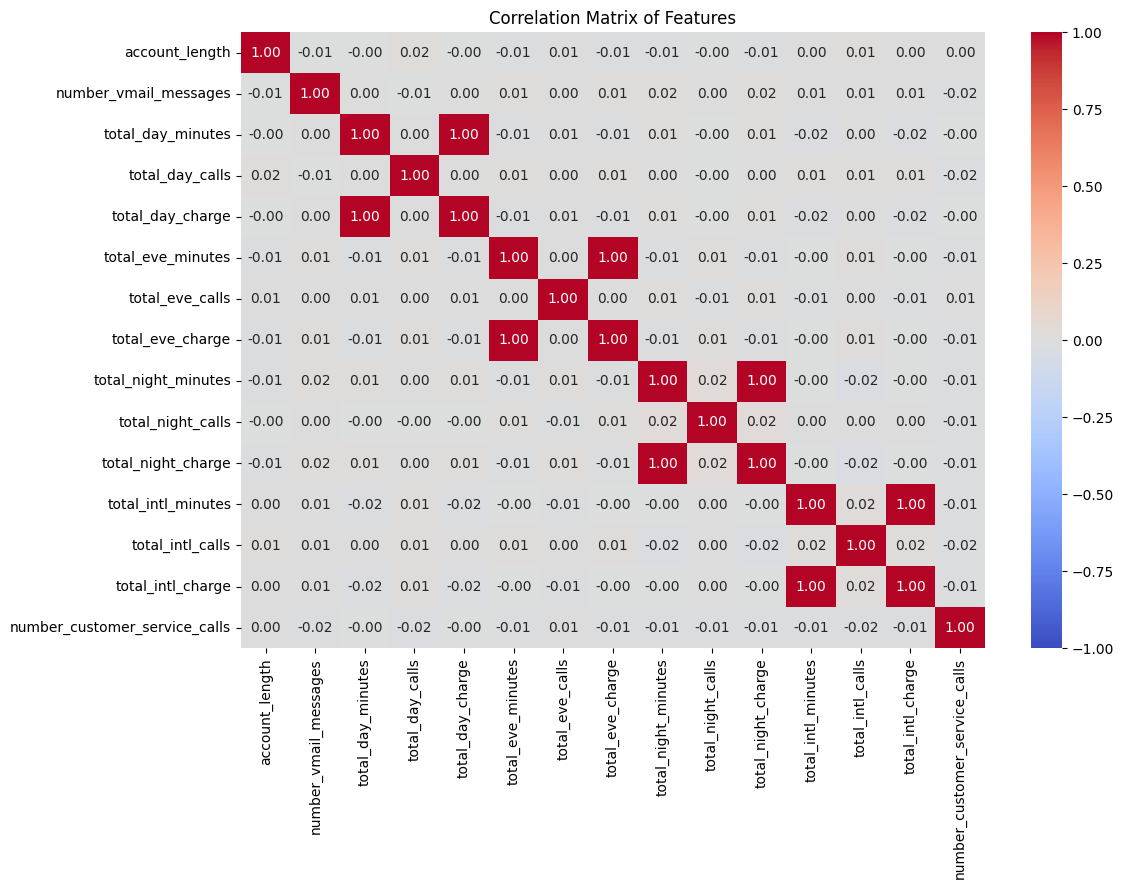

Correlation Matrix:
                               account_length  number_vmail_messages  \
account_length                       1.000000              -0.006626   
number_vmail_messages               -0.006626               1.000000   
total_day_minutes                   -0.001612               0.002000   
total_day_calls                      0.023002              -0.006920   
total_day_charge                    -0.001613               0.001994   
total_eve_minutes                   -0.010326               0.010725   
total_eve_calls                      0.005535               0.003593   
total_eve_charge                    -0.010322               0.010736   
total_night_minutes                 -0.009916               0.018308   
total_night_calls                   -0.001846               0.001977   
total_night_charge                  -0.009942               0.018300   
total_intl_minutes                   0.004539               0.005220   
total_intl_calls                     0.01369

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# **Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Separating features (X) and target (y)
X = df.drop(['customer_id', 'churn'], axis=1)  # Removing ID and target column from features
y = df['churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Defining numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocessing the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

#After preprocessing, the data has been transformed into a standardized format suitable for modeling.
#The training set has 73 columns (features) after encoding, and the data is now ready for model training.


((2975, 73), (1275, 73))

In [ ]:
#Feature Engineering
#create a few new features that may help capture customer behavior patterns:

#Average call duration: Calculated by dividing total minutes by total calls for day, evening, and night calls.
#Total calls: Sum of day, evening, night, and international calls.
#Plan features: Encoding of international_plan and voice_mail_plan as numerical (already done in preprocessing).
# Creating new features within the original dataset
# Avoid division by zero by adding 1 where calls are zero
df['avg_day_call_duration'] = df['total_day_minutes'] / (df['total_day_calls'] + 1)
df['avg_eve_call_duration'] = df['total_eve_minutes'] / (df['total_eve_calls'] + 1)
df['avg_night_call_duration'] = df['total_night_minutes'] / (df['total_night_calls'] + 1)

# Adding a total calls feature
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

# Checking new columns
df[['avg_day_call_duration', 'avg_eve_call_duration', 'avg_night_call_duration', 'total_calls']].head()


,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,total_calls
0,0.561111,1.850877,1.616667,345
1,1.912598,3.178788,1.798425,317
2,1.937391,1.893860,1.817073,349
3,1.499130,3.665714,2.240952,287
4,1.829412,1.796124,1.436434,374


# **Modeling**

In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(['customer_id', 'churn'], axis=1)# Drop the target variable from the features
y = df['churn']# Target variable (Churn)

# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting datasets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2975, 23)
X_test shape: (1275, 23)
y_train shape: (2975,)
y_test shape: (1275,)


In [ ]:
# Updating preprocessing pipeline for new feature set
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# **Logistic Regression**

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Train the model on the preprocessed training data
model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)


In [ ]:
# Evaluating the model with Confusion Matrix
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  46
True Negative :  1066
False Positive:  133
False Negative:  30


In [ ]:
# Evaluating the model with performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)
logreg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (logreg_accuracy * 100.0))
print("Precision: %.2f%%" % (logreg_precision * 100.0))
print("Recall: %.2f%%" % (logreg_recall * 100.0))
print("F1 Score: %.2f%%" % (logreg_f1 * 100.0))

Accuracy: 87.22%
Precision: 60.53%
Recall: 25.70%
F1 Score: 36.08%


# **Decision Tree**

In [ ]:
# Train the model
from sklearn.tree import DecisionTreeClassifier

# Train the model on the preprocessed training data
model = DecisionTreeClassifier()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)


In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  138
True Negative :  1027
False Positive:  41
False Negative:  69


In [ ]:
# Evaluating the model with performance metrics

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))
print("Precision: %.2f%%" % (dt_precision * 100.0))
print("Recall: %.2f%%" % (dt_recall * 100.0))
print("F1 Score: %.2f%%" % (dt_f1 * 100.0))

Accuracy: 91.37%
Precision: 66.67%
Recall: 77.09%
F1 Score: 71.50%


# **Random Forest**

In [ ]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

# Train the model on the preprocessed training data
model = RandomForestClassifier()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)


In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  114
True Negative :  1092
False Positive:  65
False Negative:  4


In [ ]:
# Evaluating the model with performance metrics

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_classification_report = classification_report(y_test, y_pred)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print("Precision: %.2f%%" % (rf_precision * 100.0))
print("Recall: %.2f%%" % (rf_recall * 100.0))
print("F1 Score: %.2f%%" % (rf_f1 * 100.0))

rf_accuracy, rf_precision, rf_recall, rf_f1, rf_classification_report, rf_confusion_matrix

Accuracy: 94.59%
Precision: 96.61%
Recall: 63.69%
F1 Score: 76.77%


(0.9458823529411765,
 0.9661016949152542,
 0.6368715083798883,
 0.7676767676767676,
 '              precision    recall  f1-score   support\n\n       False       0.94      1.00      0.97      1096\n        True       0.97      0.64      0.77       179\n\n    accuracy                           0.95      1275\n   macro avg       0.95      0.82      0.87      1275\nweighted avg       0.95      0.95      0.94      1275\n',
 array([[1092,    4],
        [  65,  114]]))

In [ ]:

# Predictions and evaluation
rf_accuracy = accuracy_score(y_test, y_pred)
rf_classification_report = classification_report(y_test, y_pred)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)

rf_accuracy, rf_classification_report, rf_confusion_matrix


(0.9458823529411765,
 '              precision    recall  f1-score   support\n\n       False       0.94      1.00      0.97      1096\n        True       0.97      0.64      0.77       179\n\n    accuracy                           0.95      1275\n   macro avg       0.95      0.82      0.87      1275\nweighted avg       0.95      0.95      0.94      1275\n',
 array([[1092,    4],
        [  65,  114]]))

# **XG Boost**

In [ ]:
from xgboost import XGBClassifier

# Train the model on the preprocessed training data
model = XGBClassifier(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)


In [ ]:
# Evaluating the model with Confusion Matrix

cf = confusion_matrix(y_pred, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  135
True Negative :  1089
False Positive:  44
False Negative:  7


In [ ]:
# Evaluating the model with performance metrics

xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (xg_accuracy * 100.0))
print("Precision: %.2f%%" % (xg_precision * 100.0))
print("Recall: %.2f%%" % (xg_recall * 100.0))
print("F1 Score: %.2f%%" % (xg_f1 * 100.0))

Accuracy: 96.00%
Precision: 95.07%
Recall: 75.42%
F1 Score: 84.11%


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the preprocessed training data
gb_model.fit(X_train_preprocessed, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Extract feature importances from the trained model
gb_feature_importances = gb_model.feature_importances_

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to display feature importances
gb_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_GB': gb_feature_importances
})

# Sort features by importance and display the top 10
gb_importances_df = gb_importances_df.sort_values(by="Importance_GB", ascending=False).reset_index(drop=True)
print("Top 10 Feature Importances for Gradient Boosting Model:")
print(gb_importances_df.head(10))


Top 10 Feature Importances for Gradient Boosting Model:
                              Feature  Importance_GB
0              num__total_day_minutes       0.174956
1               num__total_day_charge       0.159406
2  num__number_customer_service_calls       0.143799
3       cat__international_plan_False       0.098111
4               num__total_intl_calls       0.078704
5              num__total_eve_minutes       0.067201
6               num__total_eve_charge       0.061257
7          num__number_vmail_messages       0.043788
8        cat__international_plan_True       0.043036
9              num__total_intl_charge       0.032390


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the preprocessed test data
gb_predictions = gb_model.predict(X_test_preprocessed)

# Evaluate performance
print("\nGradient Boosting Model Performance")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))



Gradient Boosting Model Performance
Accuracy: 0.9505882352941176
              precision    recall  f1-score   support

       False       0.96      0.99      0.97      1096
        True       0.91      0.72      0.80       179

    accuracy                           0.95      1275
   macro avg       0.93      0.85      0.89      1275
weighted avg       0.95      0.95      0.95      1275



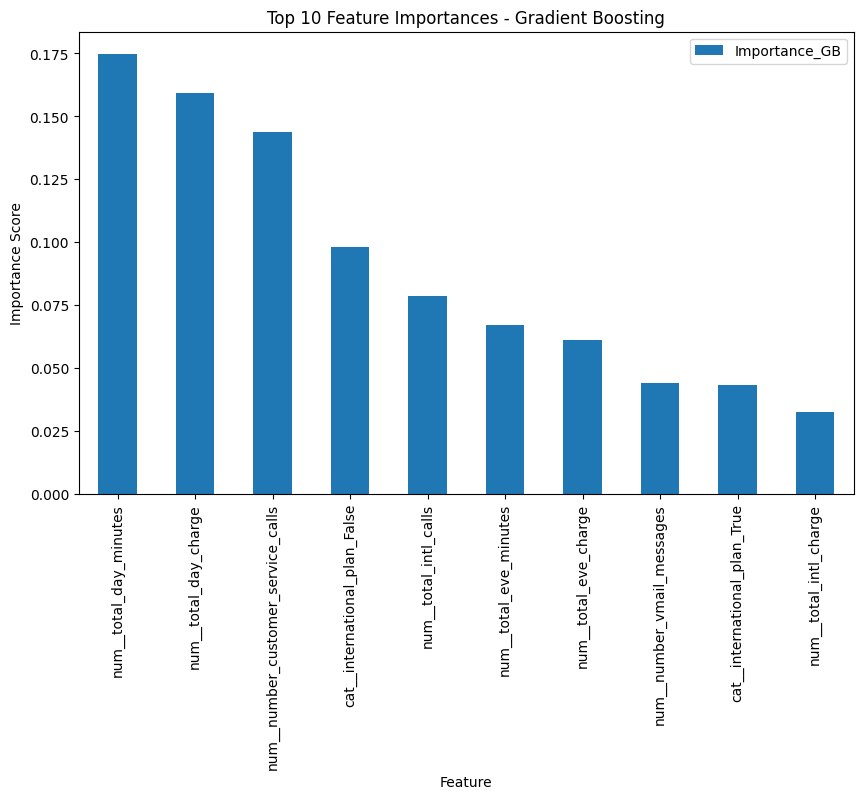

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 features by importance
top_n = 10
gb_importances_df.set_index('Feature').head(top_n).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the preprocessed test data using the Gradient Boosting model
gb_predictions = gb_model.predict(X_test_preprocessed)

# Evaluating the Gradient Boosting model with performance metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

# Printing the results
print("Gradient Boosting Model Performance Metrics:")
print("Accuracy: %.2f%%" % (gb_accuracy * 100.0))
print("Precision: %.2f%%" % (gb_precision * 100.0))
print("Recall: %.2f%%" % (gb_recall * 100.0))
print("F1 Score: %.2f%%" % (gb_f1 * 100.0))


Gradient Boosting Model Performance Metrics:
Accuracy: 95.06%
Precision: 90.85%
Recall: 72.07%
F1 Score: 80.37%


# **Comparing Models**

In [ ]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', logreg_accuracy, logreg_precision, logreg_recall, logreg_f1],
        ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
        ['Random Forest', rf_accuracy, rf_precision, rf_recall, rf_f1],
        ['XGBoost', xg_accuracy, xg_precision, xg_recall, xg_f1],
        ['Gradient Boosting', gb_accuracy, gb_precision, gb_recall, gb_f1]
    ],
    columns = ['model', 'accuracy', 'precision', 'recall', 'f1_score']
)

compare.style.highlight_max(color="green")

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.872157,0.605263,0.256983,0.360784
1,Decision Tree,0.913725,0.666667,0.770950,0.715026
2,Random Forest,0.945882,0.966102,0.636872,0.767677
3,XGBoost,0.960000,0.950704,0.754190,0.841121
4,Gradient Boosting,0.950588,0.908451,0.720670,0.803738


In [ ]:
df['tenure_months'] = (df['account_length'] / 30).round()


In [ ]:
print(df['tenure_months'])

0       3.0
1       6.0
2       2.0
3       5.0
4       3.0
       ... 
4245    1.0
4246    1.0
4247    3.0
4248    3.0
4249    4.0
Name: tenure_months, Length: 4250, dtype: float64


In [ ]:
# Check the relationship between tenure in months and churn by viewing summary statistics
churn_summary = df.groupby('churn')['tenure_months'].describe()

# Display the result
print(churn_summary)

        count      mean       std  min  25%  50%  75%  max
churn                                                     
False  3652.0  3.328313  1.357224  0.0  2.0  3.0  4.0  8.0
True    598.0  3.408027  1.347770  0.0  3.0  3.0  4.0  8.0


In [ ]:
# Calculate daily total charges by summing up the individual charges for day, evening, night, and international usage
df['daily_total_charge'] = df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)


In [ ]:
df['has_voice_mail_plan'] = df['voice_mail_plan']
df['has_international_plan'] = df['international_plan']


In [ ]:
df['total_daily_usage'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']


In [ ]:
df['estimated_monthly_usage'] = df['total_daily_usage'] * 30


In [ ]:
df['estimated_monthly_charges'] = df['daily_total_charge'] * 30


In [ ]:
import pandas as pd

# Perform calculations as before
df['tenure_days'] = df['account_length']
df['tenure_months'] = (df['tenure_days'] / 30).round()
df['total_daily_usage'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['daily_total_charge'] = df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)
df['estimated_monthly_charges'] = df['daily_total_charge'] * 30

# Convert values to 1 and 0 for clarity in numeric analysis
df['international_plan'] = df['international_plan'].replace({'Yes': 1, 'No': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'Yes': 1, 'No': 0})
df['churn'] = df['churn'].replace({True: 1, False: 0})

# Create the summary table with transformed values
customer_summary = df[['customer_id', 'tenure_days', 'tenure_months', 'total_daily_usage',
                       'total_day_minutes', 'total_day_charge',
                       'total_eve_minutes', 'total_eve_charge',
                       'total_night_minutes', 'total_night_charge',
                       'total_intl_minutes', 'total_intl_charge',
                       'daily_total_charge', 'estimated_monthly_charges',
                       'voice_mail_plan', 'international_plan', 'churn']].rename(columns={
    'customer_id': 'Customer ID',
    'tenure_days': 'Tenure (Days)',
    'tenure_months': 'Tenure (Months)',
    'total_daily_usage': 'Total Daily Usage (Minutes)',
    'total_day_minutes': 'Day Usage (Minutes)',
    'total_day_charge': 'Day Charges',
    'total_eve_minutes': 'Evening Usage (Minutes)',
    'total_eve_charge': 'Evening Charges',
    'total_night_minutes': 'Night Usage (Minutes)',
    'total_night_charge': 'Night Charges',
    'total_intl_minutes': 'International Usage (Minutes)',
    'total_intl_charge': 'International Charges',
    'daily_total_charge': 'Daily Total Charges',
    'estimated_monthly_charges': 'Estimated Monthly Charges',
    'voice_mail_plan': 'Voice Mail Plan',
    'international_plan': 'International Plan',
    'churn': 'Churned'
})

# Save to CSV and Excel for download
customer_summary.to_csv('customer_summary.csv', index=False)
customer_summary.to_excel('customer_summary.xlsx', index=False)

print("Files saved as 'customer_summary.csv' and 'customer_summary.xlsx'.")


<ipython-input-80-c0cebbaab1df>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['international_plan'] = df['international_plan'].replace({'Yes': 1, 'No': 0})
<ipython-input-80-c0cebbaab1df>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['voice_mail_plan'] = df['voice_mail_plan'].replace({'Yes': 1, 'No': 0})


Files saved as 'customer_summary.csv' and 'customer_summary.xlsx'.


In [ ]:
customer_summary

,Customer ID,Tenure (Days),Tenure (Months),Total Daily Usage (Minutes),Day Usage (Minutes),Day Charges,Evening Usage (Minutes),Evening Charges,Night Usage (Minutes),Night Charges,International Usage (Minutes),International Charges,Daily Total Charges,Estimated Monthly Charges,Voice Mail Plan,International Plan,Churned
0,932aff1e-186f-418c-8716-28bba167c384,86,3.0,456.3,70.7,12.02,211.0,17.94,174.6,7.86,0.0,0.00,37.82,1134.6,0,0,0
1,143a0b05-b95a-4d00-ad2a-9c1b18234c29,165,6.0,681.1,242.9,41.29,209.8,17.83,228.4,10.28,0.0,0.00,69.40,2082.0,0,0,0
2,45debf35-7e4d-42da-ba4e-d737a8997e16,70,2.0,662.2,222.8,37.88,215.9,18.35,223.5,10.06,0.0,0.00,66.29,1988.7,0,0,0
3,76b4b68f-1113-4411-88ad-de38b482e9fb,158,5.0,664.3,172.4,29.31,256.6,21.81,235.3,10.59,0.0,0.00,61.71,1851.3,0,0,0
4,6ee9cecd-1a09-4f4a-937e-aa848c392bed,101,3.0,634.7,217.7,37.01,231.7,19.69,185.3,8.34,0.0,0.00,65.04,1951.2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,e1db5067-6484-4a5d-b68d-ab869fff027d,36,1.0,420.6,149.4,25.40,131.8,11.20,132.7,5.97,6.7,1.81,44.38,1331.4,1,0,0
4246,99ad8c1e-c90b-44d5-ad36-d4d87aae0d85,24,1.0,612.1,164.9,28.03,209.3,17.79,231.2,10.40,6.7,1.81,58.03,1740.9,1,0,0
4247,b2287275-f563-40ae-ad9c-06844ca539f4,97,3.0,662.7,183.4,31.18,269.1,22.87,203.5,9.16,6.7,1.81,65.02,1950.6,1,0,0
4248,9908263a-a9c9-48f5-9c26-ca7cc9bd5917,81,3.0,668.4,168.3,28.61,270.9,23.03,222.5,10.01,6.7,1.81,63.46,1903.8,1,0,0


In [ ]:
import pandas as pd

# Assuming the DataFrame `df` is already loaded and processed as before

# Create the customer summary with all requested columns
customer_summary = df[['customer_id', 'state', 'area_code', 'tenure_days', 'tenure_months', 'total_daily_usage',
                       'total_day_minutes', 'total_day_calls', 'total_day_charge',
                       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                       'total_night_minutes', 'total_night_calls', 'total_night_charge',
                       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                       'daily_total_charge', 'estimated_monthly_charges',
                       'voice_mail_plan', 'international_plan', 'number_customer_service_calls', 'churn']].rename(columns={
    'customer_id': 'Customer ID',
    'state': 'State',
    'area_code': 'Area Code',
    'tenure_days': 'Tenure (Days)',
    'tenure_months': 'Tenure (Months)',
    'total_daily_usage': 'Total Daily Usage (Minutes)',
    'total_day_minutes': 'Day Usage (Minutes)',
    'total_day_calls': 'Day Calls',
    'total_day_charge': 'Day Charges',
    'total_eve_minutes': 'Evening Usage (Minutes)',
    'total_eve_calls': 'Evening Calls',
    'total_eve_charge': 'Evening Charges',
    'total_night_minutes': 'Night Usage (Minutes)',
    'total_night_calls': 'Night Calls',
    'total_night_charge': 'Night Charges',
    'total_intl_minutes': 'International Usage (Minutes)',
    'total_intl_calls': 'International Calls',
    'total_intl_charge': 'International Charges',
    'daily_total_charge': 'Daily Total Charges',
    'estimated_monthly_charges': 'Estimated Monthly Charges',
    'voice_mail_plan': 'Voice Mail Plan',
    'international_plan': 'International Plan',
    'number_customer_service_calls': 'Customer Service Calls',
    'churn': 'Churned'
})

# Save the files in CSV and Excel formats
customer_summary.to_csv('customer_summary.csv', index=False)
customer_summary.to_excel('customer_summary.xlsx', index=False)

print("Files saved as 'customer_summary.csv' and 'customer_summary.xlsx'.")


Files saved as 'customer_summary_complete_with_service_calls.csv' and 'customer_summary_complete_with_service_calls.xlsx'.


In [ ]:
# Adding 'number_vmail_messages' (voice mail messages) to the customer summary

# Update the customer summary to include the vmail messages along with all previously requested columns
customer_summary = df[['customer_id', 'state', 'area_code', 'tenure_days', 'tenure_months', 'total_daily_usage',
                       'total_day_minutes', 'total_day_calls', 'total_day_charge',
                       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                       'total_night_minutes', 'total_night_calls', 'total_night_charge',
                       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                       'daily_total_charge', 'estimated_monthly_charges',
                       'voice_mail_plan', 'international_plan', 'number_customer_service_calls',
                       'number_vmail_messages', 'churn']].rename(columns={
    'customer_id': 'Customer ID',
    'state': 'State',
    'area_code': 'Area Code',
    'tenure_days': 'Tenure (Days)',
    'tenure_months': 'Tenure (Months)',
    'total_daily_usage': 'Total Daily Usage (Minutes)',
    'total_day_minutes': 'Day Usage (Minutes)',
    'total_day_calls': 'Day Calls',
    'total_day_charge': 'Day Charges',
    'total_eve_minutes': 'Evening Usage (Minutes)',
    'total_eve_calls': 'Evening Calls',
    'total_eve_charge': 'Evening Charges',
    'total_night_minutes': 'Night Usage (Minutes)',
    'total_night_calls': 'Night Calls',
    'total_night_charge': 'Night Charges',
    'total_intl_minutes': 'International Usage (Minutes)',
    'total_intl_calls': 'International Calls',
    'total_intl_charge': 'International Charges',
    'daily_total_charge': 'Daily Total Charges',
    'estimated_monthly_charges': 'Estimated Monthly Charges',
    'voice_mail_plan': 'Voice Mail Plan',
    'international_plan': 'International Plan',
    'number_customer_service_calls': 'Customer Service Calls',
    'number_vmail_messages': 'Vmail Messages',
    'churn': 'Churned'
})

# Save the data to the current working directory without specifying '/mnt/data'
customer_summary.to_csv('customer_summary_complete_with_service_vmail.csv', index=False)
customer_summary.to_excel('customer_summary_complete_with_service_vmail.xlsx', index=False)

print("Files saved as 'customer_summary_complete_with_service_vmail.csv' and 'customer_summary_complete_with_service_vmail.xlsx'.")


Files saved as 'customer_summary_complete_with_service_vmail.csv' and 'customer_summary_complete_with_service_vmail.xlsx'.


In [ ]:
from google.colab import files

# Download the CSV file
files.download('customer_summary_complete_with_service_vmail.csv')

# Download the Excel file
files.download('customer_summary_complete_with_service_vmail.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Training Random Forest and XGBoost models to calculate feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)
rf_feature_importances = rf_model.feature_importances_

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)
xgb_feature_importances = xgb_model.feature_importances_

# Creating DataFrames to display and compare feature importances from both models
feature_names = preprocessor.get_feature_names_out()
rf_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance_RF': rf_feature_importances})
xgb_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance_XGB': xgb_feature_importances})

# Merging the importance DataFrames for easy comparison
importance_df = pd.merge(rf_importances_df, xgb_importances_df, on='Feature')

# Sorting by Random Forest importances for initial inspection
importance_df = importance_df.sort_values(by="Importance_RF", ascending=False).reset_index(drop=True)

importance_df.head(10)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Feature,Importance_RF,Importance_XGB
0,num__total_day_charge,0.152006,0.000000
1,num__total_day_minutes,0.123695,0.081709
2,num__number_customer_service_calls,0.095231,0.121172
3,num__total_eve_minutes,0.052231,0.040579
4,num__total_eve_charge,0.051538,0.007193
5,num__total_intl_calls,0.046393,0.059140
6,num__total_intl_charge,0.043592,0.000000
7,num__total_intl_minutes,0.037922,0.042007
8,cat__international_plan_False,0.037763,0.157913
9,num__total_night_charge,0.037013,0.024987


In [ ]:
# Get transformed feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Original column names (from the DataFrame before transformation)
original_columns = X.columns  # Assuming X is the DataFrame with original feature columns

# Initialize an empty mapping dictionary
name_mapping = {}

# Generate the mapping
for name in feature_names:
    if name.startswith("num__"):
        # Numerical feature: remove 'num__' prefix
        original_name = name.replace("num__", "")
        name_mapping[name] = original_name
    elif name.startswith("cat__"):
        # Categorical feature: remove 'cat__' and suffix (_True or _False for example)
        original_name = name.split("__")[1].split("_")[0]
        name_mapping[name] = original_name
    else:
        # Unmodified feature name
        name_mapping[name] = name

# Optional: Check the mapping to verify
print(name_mapping)


{'num__account_length': 'account_length', 'num__number_vmail_messages': 'number_vmail_messages', 'num__total_day_minutes': 'total_day_minutes', 'num__total_day_calls': 'total_day_calls', 'num__total_day_charge': 'total_day_charge', 'num__total_eve_minutes': 'total_eve_minutes', 'num__total_eve_calls': 'total_eve_calls', 'num__total_eve_charge': 'total_eve_charge', 'num__total_night_minutes': 'total_night_minutes', 'num__total_night_calls': 'total_night_calls', 'num__total_night_charge': 'total_night_charge', 'num__total_intl_minutes': 'total_intl_minutes', 'num__total_intl_calls': 'total_intl_calls', 'num__total_intl_charge': 'total_intl_charge', 'num__number_customer_service_calls': 'number_customer_service_calls', 'cat__state_AK': 'state', 'cat__state_AL': 'state', 'cat__state_AR': 'state', 'cat__state_AZ': 'state', 'cat__state_CA': 'state', 'cat__state_CO': 'state', 'cat__state_CT': 'state', 'cat__state_DC': 'state', 'cat__state_DE': 'state', 'cat__state_FL': 'state', 'cat__state_GA

In [ ]:
# Refine the existing mapping
name_mapping = {
    'num__account_length': 'account_length',
    'num__number_vmail_messages': 'number_vmail_messages',
    'num__total_day_minutes': 'total_day_minutes',
    'num__total_day_calls': 'total_day_calls',
    'num__total_day_charge': 'total_day_charge',
    'num__total_eve_minutes': 'total_eve_minutes',
    'num__total_eve_calls': 'total_eve_calls',
    'num__total_eve_charge': 'total_eve_charge',
    'num__total_night_minutes': 'total_night_minutes',
    'num__total_night_calls': 'total_night_calls',
    'num__total_night_charge': 'total_night_charge',
    'num__total_intl_minutes': 'total_intl_minutes',
    'num__total_intl_calls': 'total_intl_calls',
    'num__total_intl_charge': 'total_intl_charge',
    'num__number_customer_service_calls': 'number_customer_service_calls',
    # Map all state columns to a single 'state' name or keep each state's identifier if needed
    **{f'cat__state_{state}': 'state' for state in ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                                                    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                                                    'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                                                    'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                                                    'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']},
    # Map all area codes to 'area_code'
    'cat__area_code_area_code_408': 'area_code',
    'cat__area_code_area_code_415': 'area_code',
    'cat__area_code_area_code_510': 'area_code',
    # Map plan-related columns to original names
    'cat__international_plan_False': 'international_plan',
    'cat__international_plan_True': 'international_plan',
    'cat__voice_mail_plan_False': 'voice_mail_plan',
    'cat__voice_mail_plan_True': 'voice_mail_plan'
}


In [ ]:
# Merge the importance DataFrames for easy comparison
importance_df = pd.merge(rf_importances_df, xgb_importances_df, on='Feature')

# Apply the name mapping to replace 'num__' and 'cat__' names with original names
importance_df['Feature'] = importance_df['Feature'].map(name_mapping)

# Sort by Random Forest importances for initial inspection
importance_df = importance_df.sort_values(by="Importance_RF", ascending=False).reset_index(drop=True)

# Display top features
importance_df.head(10)


,Feature,Importance_RF,Importance_XGB
0,total_day_charge,0.152006,0.000000
1,total_day_minutes,0.123695,0.081709
2,number_customer_service_calls,0.095231,0.121172
3,total_eve_minutes,0.052231,0.040579
4,total_eve_charge,0.051538,0.007193
5,total_intl_calls,0.046393,0.059140
6,total_intl_charge,0.043592,0.000000
7,total_intl_minutes,0.037922,0.042007
8,international_plan,0.037763,0.157913
9,total_night_charge,0.037013,0.024987


In [ ]:
# Display top features (change 10 to a higher number to see more features)
importance_df.head(20)


,Feature,Importance_RF,Importance_XGB
0,total_day_charge,0.152006,0.000000
1,total_day_minutes,0.123695,0.081709
2,number_customer_service_calls,0.095231,0.121172
3,total_eve_minutes,0.052231,0.040579
4,total_eve_charge,0.051538,0.007193
5,total_intl_calls,0.046393,0.059140
6,total_intl_charge,0.043592,0.000000
7,total_intl_minutes,0.037922,0.042007
8,international_plan,0.037763,0.157913
9,total_night_charge,0.037013,0.024987


In [ ]:
#Key Insights:
#Random Forest shows total_day_charge and total_day_minutes as top features, highlighting the role of daily usage in churn prediction.
#XGBoost places a strong emphasis on the international_plan_False feature, suggesting a significant relationship between not having an international plan and churn likelihood.

In [ ]:
# Define columns to drop based on low importance or correlation
low_importance_columns = [
     'customer_id', 'state', 'area_code', 'total_eve_calls', 'total_night_calls',
    'total_intl_charge', 'total_eve_charge', 'total_night_charge',
    'total_intl_minutes', 'number_vmail_messages', 'account_length'
]

# Drop these columns from the DataFrame
df_reduced = df.drop(columns=low_importance_columns)

# Verify the new structure of the dataset
df_reduced.head()


,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_calls,number_customer_service_calls,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,total_calls,tenure_months
0,False,False,70.7,125,12.02,211.0,174.6,0,2,False,0.561111,1.850877,1.616667,345,3.0
1,False,False,242.9,126,41.29,209.8,228.4,0,1,False,1.912598,3.178788,1.798425,317,6.0
2,False,False,222.8,114,37.88,215.9,223.5,0,1,False,1.937391,1.893860,1.817073,349,2.0
3,False,False,172.4,114,29.31,256.6,235.3,0,2,False,1.499130,3.665714,2.240952,287,5.0
4,False,False,217.7,118,37.01,231.7,185.3,0,3,False,1.829412,1.796124,1.436434,374,3.0


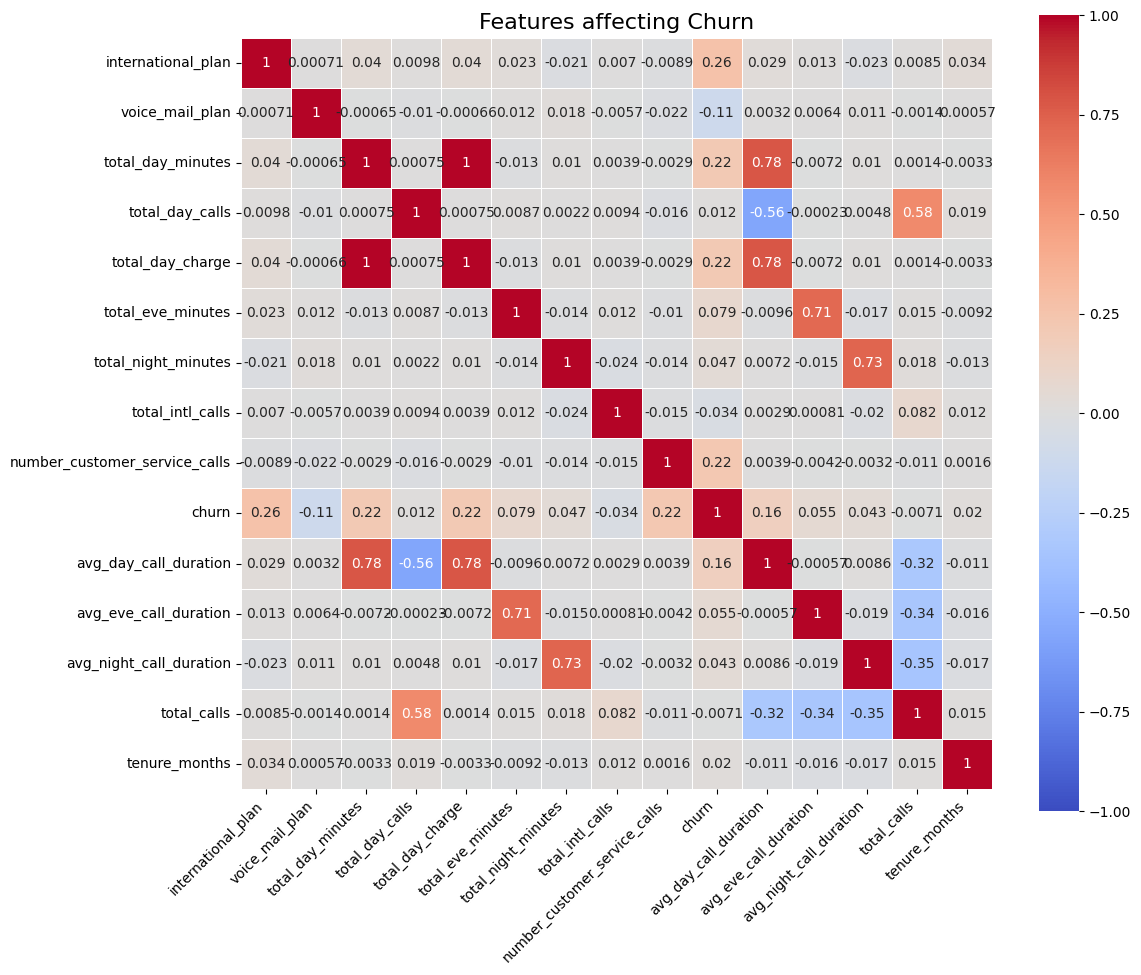

In [ ]:
# Compute the correlation matrix on the reduced DataFrame
correlation_matrix_reduced = df_reduced.corr()

# Plot the heatmap of the recomputed correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)

# Add titles and labels
plt.title("Features affecting Churn", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Print the recomputed correlation matrix for the reduced DataFrame
correlation_matrix_reduced


,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_night_minutes,total_intl_calls,number_customer_service_calls,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,total_calls,tenure_months
international_plan,1.000000,0.000714,0.040059,0.009776,0.040061,0.023484,-0.020694,0.006956,-0.008881,0.259053,0.029489,0.013318,-0.023163,0.008549,0.033759
voice_mail_plan,0.000714,1.000000,-0.000653,-0.010004,-0.000658,0.011982,0.017884,-0.005674,-0.021504,-0.114643,0.003223,0.006388,0.011017,-0.001424,0.000570
total_day_minutes,0.040059,-0.000653,1.000000,0.000747,1.000000,-0.013248,0.010049,0.003859,-0.002925,0.215272,0.781985,-0.007248,0.010128,0.001356,-0.003319
total_day_calls,0.009776,-0.010004,0.000747,1.000000,0.000751,0.008661,0.002206,0.009377,-0.015845,0.011640,-0.559205,-0.000225,0.004845,0.575091,0.018944
total_day_charge,0.040061,-0.000658,1.000000,0.000751,1.000000,-0.013247,0.010053,0.003853,-0.002932,0.215263,0.781983,-0.007247,0.010132,0.001355,-0.003321
total_eve_minutes,0.023484,0.011982,-0.013248,0.008661,-0.013247,1.000000,-0.014018,0.012239,-0.010063,0.078855,-0.009580,0.714145,-0.016572,0.014612,-0.009156
total_night_minutes,-0.020694,0.017884,0.010049,0.002206,0.010053,-0.014018,1.000000,-0.024280,-0.013771,0.046647,0.007245,-0.014746,0.728097,0.018258,-0.012663
total_intl_calls,0.006956,-0.005674,0.003859,0.009377,0.003853,0.012239,-0.024280,1.000000,-0.015302,-0.034334,0.002858,0.000814,-0.020227,0.081842,0.011681
number_customer_service_calls,-0.008881,-0.021504,-0.002925,-0.015845,-0.002932,-0.010063,-0.013771,-0.015302,1.000000,0.221220,0.003933,-0.004204,-0.003243,-0.011369,0.001625
churn,0.259053,-0.114643,0.215272,0.011640,0.215263,0.078855,0.046647,-0.034334,0.221220,1.000000,0.163448,0.055401,0.042650,-0.007079,0.020443


Notable Correlations:
churn has the highest positive correlations with international_plan (0.259), number_customer_service_calls (0.221), and total_day_minutes (0.215), indicating these features are significant factors in predicting churn.
Some other features show minimal correlations with churn, such as total_intl_calls and total_night_minutes, which might indicate a weaker influence on churn.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


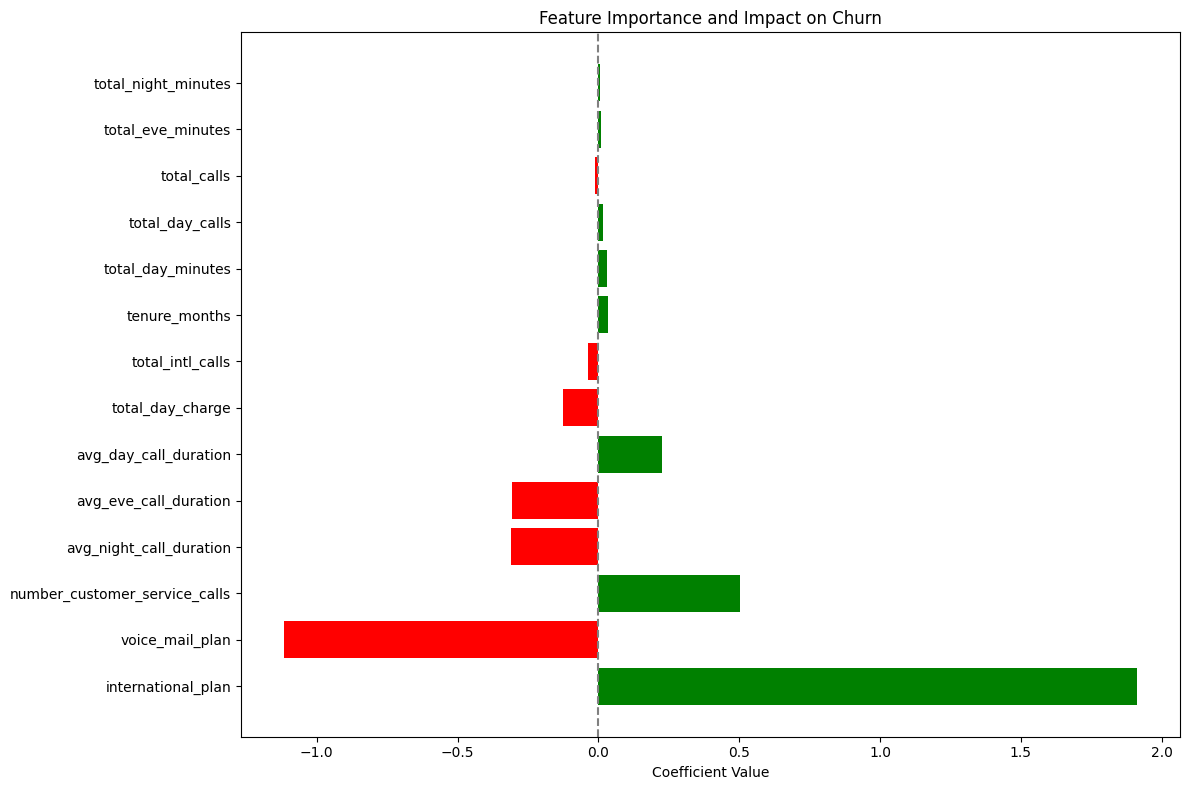

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

# Prepare features and target
X = df_reduced.drop(columns=['churn'])  # Ensure 'churn' is not in the feature set
y = df_reduced['churn']  # Target variable

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

# Extract coefficients and feature names
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame to store features and their coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Determine positive and negative impact on churn
coef_df['Impact'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Sort by absolute coefficient values to see the most impactful features
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plot positive and negative coefficients
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=coef_df['Impact'].map({'Positive': 'green', 'Negative': 'red'}))
plt.xlabel('Coefficient Value')
plt.title('Feature Importance and Impact on Churn')
plt.axvline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# Ensure 'international_plan' and 'voice_mail_plan' are numeric (1 for True, 0 for False)
X['international_plan'] = X['international_plan'].astype(int)
X['voice_mail_plan'] = X['voice_mail_plan'].astype(int)

# Drop any remaining non-numeric columns, if present
X_numeric = X.select_dtypes(include=[float, int])  # Select only numeric columns

# Re-train the Logistic Regression model with only numeric features
log_reg.fit(X_numeric, y)

# Extract coefficients and feature names
coefficients = log_reg.coef_[0]
features = X_numeric.columns

# Create a DataFrame to store features and their coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Determine positive and negative impact on churn
coef_df['Impact'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Sort by absolute coefficient values to see the most impactful features
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Display the feature importances with coefficients and impact
coef_df.reset_index(drop=True)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient,Impact
0,international_plan,1.913434,Positive
1,voice_mail_plan,-1.117811,Negative
2,number_customer_service_calls,0.503493,Positive
3,avg_night_call_duration,-0.310555,Negative
4,avg_eve_call_duration,-0.307123,Negative
5,avg_day_call_duration,0.224681,Positive
6,total_day_charge,-0.125035,Negative
7,total_intl_calls,-0.038263,Negative
8,tenure_months,0.032422,Positive
9,total_day_minutes,0.032370,Positive


                             churn  intl_plan_high_day_usage
churn                     1.000000                  0.193891
intl_plan_high_day_usage  0.193891                  1.000000
Chi-square test statistic: 156.48950108180307, p-value: 6.617620046674904e-36


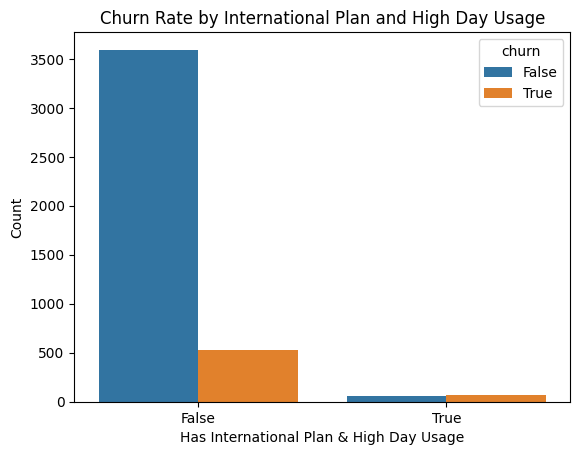

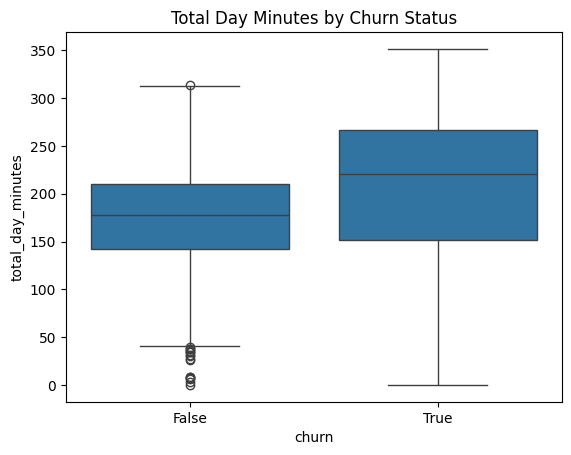

KeyError: 'MonthlyCharges'

In [ ]:

# Define high day usage based on the 75th percentile
high_day_usage_threshold = df['total_day_minutes'].quantile(0.75)
df['high_day_usage'] = df['total_day_minutes'] > high_day_usage_threshold


df['intl_plan_high_day_usage'] = (df['international_plan'] == True) & (df['high_day_usage'] == True)

correlation = df[['churn', 'intl_plan_high_day_usage']].corr()
print(correlation)

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['churn'], df['intl_plan_high_day_usage'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2}, p-value: {p}")

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='intl_plan_high_day_usage', hue='churn', data=df)
plt.title('Churn Rate by International Plan and High Day Usage')
plt.xlabel('Has International Plan & High Day Usage')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='churn', y='total_day_minutes', data=df)
plt.title('Total Day Minutes by Churn Status')
plt.show()

sns.kdeplot(df[df['intl_plan_high_day_usage']]['MonthlyCharges'], label='Intl Plan & High Day Usage', shade=True)
sns.kdeplot(df[~df['intl_plan_high_day_usage']]['MonthlyCharges'], label='Others', shade=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()
